# QUANTUM FOURIER TRANSFORM (QFT) ALgorithm

In [29]:
# For the Quantum Fourier Transform, we need to specify the number of qubits in the quantum register

input = "0001" #Change this to the binary number you want to transform

The QFT for a 3-qubit system transforms a state `|x>` to a new state `|ψ>` as follows:

QFT|xyz> = 1/√8 * ( 
    |0> + e^(2πi(x/2)) |1> ⊗
    |0> + e^(2πi((2x + y)/2^2)) |1> ⊗
    |0> + e^(2πi((4x + 2y + z)/2^3)) |1>
)



Here, `x`, `y`, and `z` are the qubits in the input state `|xyz>`, `i` is the imaginary unit, and `e` is the base of the natural logarithm. The state `|0>` and `|1>` are the basis states of a qubit. The factor `1/√8` is a normalization factor to ensure that the total probability of the quantum state remains 1.

This transformation is applied to each possible 3-qubit state (`|000>`, `|001>`, ..., `|111>`), resulting in a superposition of states with different phases.

### --------------------------------------------

The `cu` function in Qiskit stands for Controlled-U gate. It's a two-qubit gate, where one qubit (the control) decides whether to apply a U gate on the other qubit (the target). The U gate is a general unitary gate, defined as follows:



##### U(θ, φ, λ) = [[cos(θ/2), -exp(iλ)sin(θ/2)], [exp(iφ)sin(θ/2), exp(iλ + iφ)cos(θ/2)]]



The parameters `θ`, `φ`, and `λ` are real numbers representing the angles that define the transformation in the Bloch sphere, a geometrical representation used in quantum computing. 

In the context of the `cu` function, the parameters are defined as follows:

- `θ` (theta) is the parameter for the rotation around the y-axis.
- `φ` (phi) is the parameter for the rotation around the z-axis (before the y-rotation).
- `λ` (lambda) is the parameter for the rotation around the z-axis (after the y-rotation).
- `Gamma` is the parameter for the global phase shift.

In the `cu` function, the `gamma` parameter is applied to the control qubit when the target qubit is in the `|1>` state. This can be useful in certain quantum algorithms where a phase kickback is required.

The `cu` function in Qiskit is defined as follows:



##### circuit.cu(theta, phi, lam, gamma, control_qubit, target_qubit)

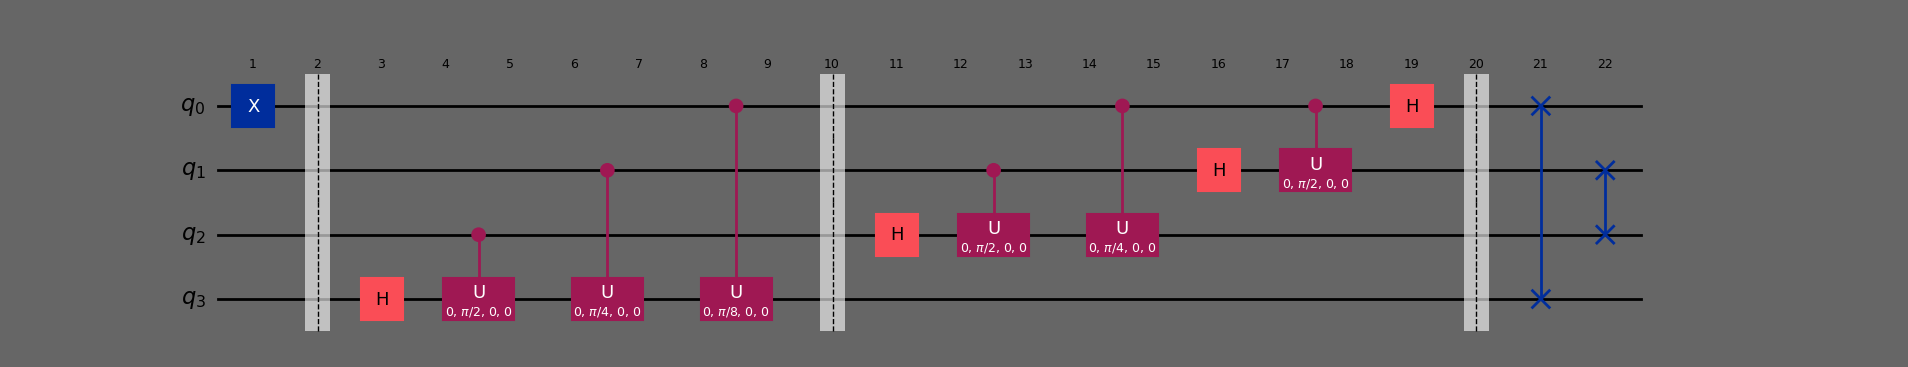

In [30]:
from qiskit import QuantumRegister, QuantumCircuit
import math
from qiskit.quantum_info import Statevector

# Create a quantum circuit with "nQubits" qubits
q = QuantumRegister(len(input), "q")
# c = ClassicalRegister(len(input), "c")

circuit = QuantumCircuit(q)

# Aplying the input state to the qubits (the input is given as a string of bits)
for i, bit in enumerate(reversed(input)):
    if bit == "1":
        circuit.x(q[i])

# Barrier to separate the input state from the rest of the circuit
circuit.barrier()

circuit.h(q[3])
circuit.cu(0, math.pi/2, 0, 0, q[2], q[3])
circuit.cu(0, math.pi/4, 0, 0, q[1], q[3])
circuit.cu(0, math.pi/8, 0, 0, q[0], q[3])
circuit.barrier()

circuit.h(q[2])
circuit.cu(0, math.pi/2, 0, 0, q[1], q[2])
circuit.cu(0, math.pi/4, 0, 0, q[0], q[2])

circuit.h(q[1])
circuit.cu(0, math.pi/2, 0, 0, q[0], q[1])

circuit.h(q[0])


circuit.barrier()
# circuit.measure(q, c)

# swap the qubits to match the order of the qiskit output (q[0] is the least significant qubit)
circuit.swap(q[0], q[3])
circuit.swap(q[1], q[2])

style = {
    'backgroundcolor': '#666666', # color of the background
    'textcolor': '#000000', # color of all text (e.g. gate names, etc.)
    'gatetextcolor': '#FFFFFF', # color of the text on the gates
    'subfontsize': 9, # font size of subscripts
    'fontsize': 13, # font size of the normal text
    'linewidth': 1.0, # width of the lines
    'barrierfacecolor': 'white', # facecolor of the barrier box
    'showindex': True, # show the index of the qubits (0, 1, 2, 3, ...)
    'figwidth': 0, # default figure width (in inches)
    'margin': [4.0, 4.0, 0.4, 1.0] # margin (right, left, bottom, top)
}
circuit.draw(style=style, output='mpl')

QFT of: | 0001 >


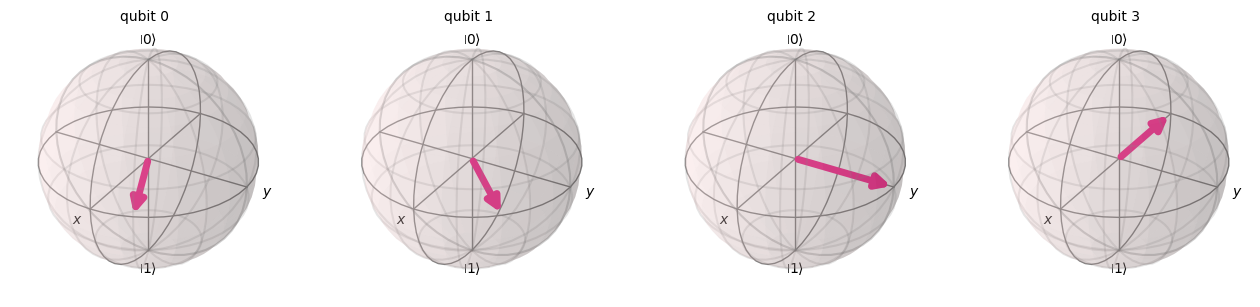

In [31]:
sphere = Statevector(circuit)

# The input is given as a string of bits, and we want to convert it to a real number
in_x = int(input, 2)
print("QFT of: |",input,">")

# plot_bloch_multivector(sphere)
# If you dont import plot_bloch_multivector, 
# you can use the following code to plot the bloch sphere
sphere.draw("bloch")

### Akwgnolegement
- This sequence output was being extracted from a [Qiskit Repositorie]()

![image.png]()
https://raw.githubusercontent.com/Qiskit/textbook/aebdd2bc86ddb7a79dd8441d52c839d312ffafbb/notebooks/ch-algorithms/images/fourierbasis-counting.gif


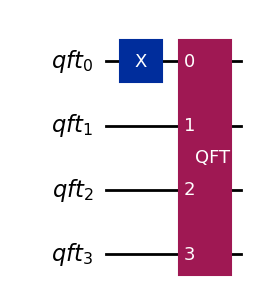

In [45]:
# In this case, im goin to import Quantum Fourier Transform from qiskit:
from qiskit.circuit.library import QFT
qft = QuantumRegister(4, 'qft')

qc = QuantumCircuit(qft)

# Apply the input state to the qubits
for i, bit in enumerate(reversed(input)):
    if bit == "1":
        qc.x(qft[i]) 
# Add the QFT to the circuit
qc.append(QFT(4), qft)

qc.draw('mpl')

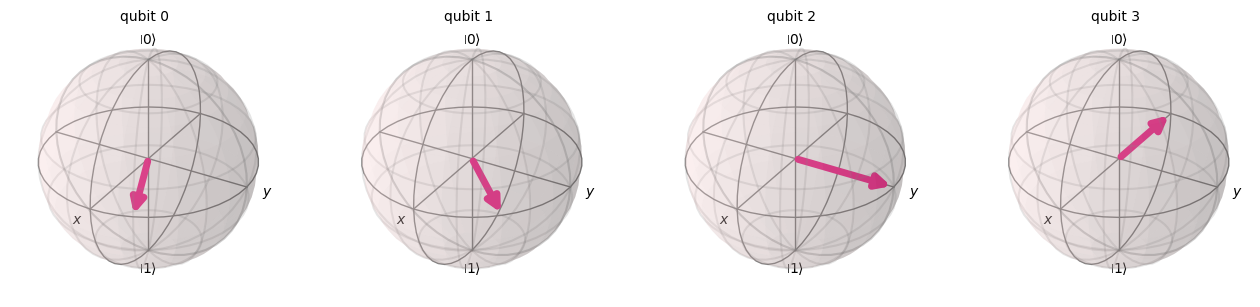

In [42]:
from qiskit.quantum_info import Statevector
state = Statevector(qc)
state.draw("bloch")